**Source** : *DQLab https://https://www.dqlab.id/*

In [13]:
library("openxlsx")
dataCreditRating <- read.xlsx(xlsxFile = "dataset/credit_scoring.xlsx")
head(dataCreditRating)

kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
AGR-000001,295,YA,48,5,61 - 90 days,4
AGR-000011,271,YA,36,5,61 - 90 days,4
AGR-000030,159,TIDAK,12,0,0 - 30 days,1
AGR-000043,210,YA,12,3,46 - 60 days,3
AGR-000049,165,TIDAK,36,0,31 - 45 days,2
AGR-000063,220,TIDAK,24,5,0 - 30 days,1


### Analisa dan Model Pengambilan Keputusan

Model Pengambilan Keputusan : 
* Jika jumlah tanggungan berjumlah lebih dari 4, kecenderungan resikonya sangat tinggi (rating 4 dan 5).
* Jika durasi pinjaman semakin lama yaitu lebih dari 24 bulan, maka kecenderungan resiko juga meningkat (rating 4 dan 5).

Dari kedua temuan ini, analis akan membentuk aturan-aturan untuk menuntun pengambilan keputusan (decision making model) terhadap pengajuan pinjaman baru untuk sebagai berikut:
* Jika jumlah tanggungan berjumlah kurang dari 5 orang , dan durasi pinjaman kurang dari 24 bulan maka rating diberikan nilai 2 dan pengajuan pinjaman diterima. 
* Jika jumlah tanggungan berjumlah lebih dari 4 orang dan durasi pinjaman lebih dari 24 bulan maka maka rating diberikan nilai 5 dan pengajuan pinjaman ditolak.
* Jika jumlah tanggungan berjumlah kurang dari 5, dan durasi pinjaman kurang dari 36 bulan maka maka rating diberikan nilai 3 dan diberikan pinjaman. 

Tiga aturan itu disebut sebagai model untuk memprediksi nilai risk rating dan menjadi basis pengambilan keputusan terhadap aplikasi pinjaman baru.

Dengan model ini, lembaga pinjaman akan semakin cepat mengambil keputusan dan dengan tingkat kesalahan pengambilan keputusan yang lebih minim.

### Credit Risk

Credit risk adalah resiko yang harus ditanggung oleh seorang individu atau lembaga ketika memberikan pinjaman - biasanya dalam bentuk uang - ke individu atau pihak lain.

Resiko ini berupa tidak bisa dibayarkannya pokok dan bunga pinjaman, sehingga mengakibatkan kerugian berikut:

* gangguan aliran kas (cash flow) sehingga modal kerja terganggu.
* meningkatkan biaya operasional untuk mengejar pembayaran tersebut (collection).

**Credit score** dan **Risk rating** adalah dua penilaian yang dilakukan meminimalkan resiko dari pihak pemberi kredit. Karena berdasarkan kedua model penilaian tersebut, akan diputuskan apakah aplikasi peminjaman seseorang disetujui atau ditolak.

### Decision Tree

Decision Tree merupakan sebuah metode untuk proses pengambilan keputusan dengan konstruksi rangkaian "Jika kondisi x maka .... selain itu .... " atau dikenal dengan "IF ... ELSE ... ".

Dari contoh bab satu, rangkaiannya terlihat sebagai berikut:

* Jika jumlah tanggungan berjumlah kurang dari 2 orang , dan durasi pinjaman kurang dari 42 bulan maka rating diberikan nilai 1 dan pengajuan pinjaman diterima. 
* Jika jumlah tanggungan berjumlah lebih dari 4 orang dan durasi pinjaman lebih dari 30 bulan maka maka rating diberikan nilai 5 dan pengajuan pinjaman ditolak.
* Jika jumlah tanggungan berjumlah kurang dari 5, dan durasi pinjaman kurang dari 30 bulan maka maka rating diberikan nilai 3 dan diberikan pinjaman. 

Rangkaian ini sebenarnya bisa dimodelkan kembali dengan apa yang dinamakan struktur pohon keputusan atau decision tree, seperti ditampilkan secara visual sebagai berikut.

![Nama_gambar](images/decision_tree.png)

Disini, proses pengambilan keputusan adalah melihat dari kondisi paling atas, yaitu berapa jumlah tanggungan. Jika tanggungannya berjumlah 3 atau 4 maka akan langsung ke kotak bawah paling kanan yang menunjukkan rating 3.

Dan kalau kita telusuri lagi, untuk jumlah tanggungan 5 dan durasi pinjaman kurang dari 30 maka akan masuk ke rating nilai 4.

### Komponen Decision Tree

![Nama_gambar](images/decision_tree_2.png)

Berikut adalah komponen dari decision tree:

* **Node**: diwakili oleh 1, 3 dan 4.
* **Branch** (cabang) atau **split** (pemisah): diwakili oleh 2.
* **Root node**: atau node akar, diwakili oleh 3.
* **Leaf node**: atau node daun, diwakili oleh 4.

Mengerti komponen-komponen ini sangat penting untuk memahami output dari algoritma machine learning yang digunakan.

### Pemodelan Decision Tree dengan Machine Learning

Otomatisasi model decision tree akan menggunakan salah satu algoritma populer di R, yaitu C5.0

C5.0 adalah kode penamaan suatu algoritma untuk decision tree. Banyak algoritma lain seperti random forest, CART, CHAID, MARS, dan lain-lain. Namun C5.0 adalah algoritma yang sangat populer karena memiliki performa yang sangat baik dari sisi kecepatan maupun akurasi.

Algoritma ini sering dikategorikan sebagai classification, dimana tujuannya adalah untuk mengkategorikan atau mengklasifikan sesuatu dalam hal ini kita akan mengklasifikasikan **Risk rating** - berdasarkan input dari data-data lain.

### Data Preparation untuk Class Variable

In [14]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "dataset/credit_scoring.xlsx")
head(dataCreditRating)
str(dataCreditRating)

kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
AGR-000001,295,YA,48,5,61 - 90 days,4
AGR-000011,271,YA,36,5,61 - 90 days,4
AGR-000030,159,TIDAK,12,0,0 - 30 days,1
AGR-000043,210,YA,12,3,46 - 60 days,3
AGR-000049,165,TIDAK,36,0,31 - 45 days,2
AGR-000063,220,TIDAK,24,5,0 - 30 days,1


'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 days" "46 - 60 days" ...
 $ risk_rating            : num  4 4 1 3 2 1 2 2 2 2 ...


Untuk class variable, yaitu risk_rating masih dibaca dalam bentuk numerik. Untuk menjadi class variable yang digunakan pada algoritma C5.0, maka perlu dikonversi menjadi **factor**. Ini bisa dilakukan dengan menggunakan perintah berikut.

In [18]:
#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
str(dataCreditRating)

'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 days" "46 - 60 days" ...
 $ risk_rating            : Factor w/ 5 levels "1","2","3","4",..: 4 4 1 3 2 1 2 2 2 2 ...


### Data Preparation untuk Input Variables

Tidak semua input variable yang perlu digunakan, apalagi yang sangat berkaitan sangat erat dengan **risk_rating**, yaitu **rata_rata_overdue**. Input variable ini akan dibuang, proses ini disebut sebagai *feature selection*.

Karena menggunakan data frame sebagai tipe data input untuk C5.0, maka field-field yang ingin digunakan bisa dimasukkan sebagai vector untuk proses filter data.

Berikut adalah perintah untuk membuat vector nama kolom yang dibutuhkan saat ini, yaitu **durasi_pinjaman_bulan** dan **jumlah_tanggungan**. Hasil filtering ini kemudian disimpan ke variabel baru bernama ***datafeed***, dan perintah terakhir digunakan melihat struktur variable ini.

*Catatan*: **kode_kontrak** harusnya tidak dipilih karena unik untuk keseluruhan data, dan tidak menjadi penentu untuk membentuk pola. Tetapi ini dimasukkan dengan tujuan untuk menunjukkan C5.0 memiliki kemampuan untuk membuang variable input yang tidak relevan secara otomatis. 

In [19]:
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]
str(datafeed)

'data.frame':	900 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan    : num  5 5 0 3 0 5 3 3 5 6 ...


### Training Set dan Testing Set

Untuk proses pembentukan model machine learning dan melihat akurasinya, biasanya dataset perlu dibagi menjadi dua, yaitu:

* **Training set**: adalah porsi dataset yang digunakan oleh algoritma untuk dianalisa dan menjadi input untuk pembentukan model. 
* **Testing set**: adalah porsi dataset yang tidak digunakan untuk membentuk model, tapi untuk menguji model yang telah dibentuk.

Pembentukan ini biasanya menggunakan metode pemilihan acak. Dalam hal ini, dataset akan dibagi menjadi 800 baris data untuk training set dan 100 baris data untuk testing set.

### Mempersiapkan Training dan Testing Set

Training dan testing set akan mengambil dari variable data frame bernama **datafeed** yang telah dipersiapkan. Jumlah baris dataset adalah 900, dimana akan diambil 800 baris secara acak sebagai training set dan sisa 100 sebagai testing set.

Langkah pertama adalah menyusun index untuk training set, caranya adalah menggunakan kedua perintah berikut.

In [26]:
#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)
length(indeks_training_set)

[1] 800

In [28]:
head(indeks_training_set,100) #Hanya menampilkan data indeks_training_set sejumlah 100 dari 800

[1] 714 503 358 624 718 470 516 823 838  98   7 183 299 504 466 307 456 146
 [19] 793 258 435 324  68 510 560 288 341 347 167 377 784 628 450 605 301 670
 [37] 158 733  87 607 223 732 251 543 694 425 489 297 502 171 519 703 449 393
 [55] 660 363 600 387 420 371 430 254  47 439 708  12 121  16 406 643 133 556
 [73] 156 757 281 554 655 185 298 421 666 490 792 396 137 250 845 567 849 291
 [91] 314 538 233  48 255 118  37 222 731 658

dimana:

* **set.seed(100)** adalah perintah untuk menyeragamkan pengambilan bilangan acak di seluruh aplikasi R.
* **sample(900, 800)** adalah membuat urutan acak dengan rentang nilai 1 sampai dengan 900, tetapi diambil sebanyak 800 nilai.

Langkah kedua adalah membuat variable untuk training set (input dan class variable) dan testing set (input variable saja) berdasarkan index di atas dengan perintah berikut.

In [29]:
#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

In [39]:
#Cek output data input training set
head(input_training_set)
nrow(input_training_set)

,durasi_pinjaman_bulan,jumlah_tanggungan
714,36,1
503,24,1
358,36,5
624,36,1
718,36,5
470,24,3


[1] 800

In [40]:
#Cek output data class training set
head(class_training_set)
length(class_training_set)

[1] 1 1 4 1 5 3
Levels: 1 2 3 4 5

[1] 800

In [41]:
#Cek output data input testing set
head(input_testing_set)
nrow(input_testing_set)

,durasi_pinjaman_bulan,jumlah_tanggungan
3,12,0
5,36,0
8,48,3
40,36,3
41,48,6
44,48,5


[1] 100

In [42]:
str(input_training_set)
str(class_training_set)
str(input_testing_set)

'data.frame':	800 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  36 24 36 36 36 24 12 48 48 12 ...
 $ jumlah_tanggungan    : num  1 1 5 1 5 3 3 3 0 0 ...
 Factor w/ 5 levels "1","2","3","4",..: 1 1 4 1 5 3 3 3 2 1 ...
'data.frame':	100 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  12 36 48 36 48 48 12 12 12 12 ...
 $ jumlah_tanggungan    : num  0 0 3 3 6 5 0 0 0 4 ...


dimana:

* **input_training_set** akan diisi dari data frame **datafeed** dengan index yang isinya terdapat pada variable **indeks_training_set**.
* **class_training_set** akan diisi dari data frame **dataCreditRating** dengan index yang isinya terdapat pada variable **indeks_training_set**.
* **input_testing_set** akan diisi **datafeed** dengan index yang isinya tidak ada di **indeks_training_set** - perhatikan tanda minus yang ada di depan variable **indeks_training_set**.

### Menghasilkan Model dengan Fungsi C5.0
 
Penggunaan algoritma C5.0 untuk menghasilkan model decision tree memerlukan package R bernama "C50".

Syntax penggunaan fungsi C5.0 adalah sebagai berikut:

In [43]:
#menghasilkan dan menampilkan summary model
risk_rating_model <- C5.0(input_training_set, class_training_set)
summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set)


C5.0 [Release 2.07 GPL Edition]  	Sat Mar 12 08:51:52 2022
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b): class 2
	           3   250                (c): c

### Algoritma C5.0

Algoritma C5.0 adalah algoritma machine learning yang digunakan untuk membentuk model pohon keputusan (decision tree) secara otomatis, dan cocok untuk memodelkan dan sebagi alat prediksi credit rating.

Karena algoritma ini masuk ke dalam kategori classification, variable yang diperlukan oleh algoritma ini ada dua macam:

* **Class variable**, yaitu variable yang berisi nilai yang ingin kita klasifikasikan. Variable ini harus berisi tipe factor.
* **Input variables**, yaitu variable-variable yang berisi nilai input.

Dan untuk mengukur akurasi dari model yang kita hasilkan, kita sebaiknya membagi dataset yang ada menjadi dua porsi secara random:

* **Training set**, yang digunakan untuk memberikan input ke algoritma untuk membentuk model.
* **Testing set**, yang akan digunakan untuk data pembanding untuk mengukur akurasi algoritma.

### Pembahasan Hasil Summary Model

##### Label dari Class

Perhatikan baris pertama potongan output yang di warnai biru sebagai berikut (output lainnya dihilangkan).

![class](images/class.PNG)

Ini artinya class variable dilabelkan atau dinamakan sebagai outcome. Jika ingin merubah label yang lebih mewakili, yaitu "Risk Rating", maka bisa ditambahkan parameter **control** dengan input berupa fungsi **C5.0Control** dan parameter **label** sebagai berikut.

In [46]:
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label = "Risk Rating"))
summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Sat Mar 12 08:56:04 2022
-------------------------------

Class specified by attribute `Risk Rating'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b)

#### Jumlah Data dan Variable yang Digunakan

![class2](images/class2.png)

Hasil ini artinya 800 baris data yang dibaca. Ini karena data yang diambil sebanyak 800 dari 900 data dengan menggunakan function sample(900, 800)

Kemudian untuk bagian 3 attributes, ini artinya ada tiga variable pada data, yaitu:

* input variables: **durasi_pinjaman** dan **jumlah_tanggungan**. Dua variable ini didapatkan dari hasil perintah berikut.

In [ ]:
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

* class variable: **risk_rating**

Berikut adalah gambar tampilan dari tiga variable tersebut di Excel.

![risk_rating](images/risk_rating.png)

Untuk **undefined.data** bisa diabaikan, karena bagian ini harusnya berisi informasi file .data dari program C5.0 yang asli. Jika ingin mengetahui lebih lanjut mengenai hal ini bisa dilihat pada url https://www.rulequest.com/see5-unix.html dan fokus ke bagian *preparing data*.

Jika diganti dua hal berikut pada code editor:

* **input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")**
menjadi **input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan", "kpr_aktif")**
* **sample(900, 800)** menjadi **sample(900, 780)**

Maka akan mendapatkan output baru sebagai berikut. Perhatikan jumlah cases dan attributes sudah berubah.

![class3](images/class3.png)

### Tampilan Teks dari Model Decision Tree

Tampilan model decision

![mdt1](images/mdt1.png)

Untuk membantu penjelasan, berikut output yang telah diberikan pewarnaan.

![mdt2](images/mdt2.png)

Berikut adalah arti pewarnaan tersebut:

* **Warna biru** adalah node dan kondisi splitnya. Hubungan antar node (connector) ditulis dengan karakter titik dua dan titik berulang (:...).
* **Warna merah** adalah leaf node atau klasifikasinya.
* **Warna ungu** adalah statistik kesalahannya dalam bentuk (jumlah_klasifikasi / jumlah_kesalahan).

Contoh satu alur yang telah diwarnai berikut.

![mdt3](images/mdt3.png)

Dari sini alur pengambilan keputusan untuk menentukan risk rating adalah: Jika jumlah tanggungan >lebih dari 4 maka perlu dilihat kondisi berikutnya yaitu:

1. Jika durasi pinjaman sampai dengan 24 bulan, maka klasifikasi risk ratingnya adalah 4.
Dari dataset training, alur ini mengklasifikasikan 98 data, namun 25 diantara 98 data ini salah klasifikasi. Berikut adalah tampilan data asal, terlihat beberapa kondisi yang terpenuhi namun bukan dengan nilai risk rating 4 (warna merah).

![mdt4](images/mdt4.png)

2. Jika durasi pinjaman lebih dari 24 bulan, maka klasifikasi risk ratingnya adalah 5.
Dari dataset training, alur ini mengklasifikasikan 129 data, namun 49 diantara 129 data ini salah klasifikasi. Berikut adalah tampilan data asal, terlihat beberapa kondisi yang terpenuhi namun bukan dengan nilai risk rating 5 (warna merah).

![mdt5](images/mdt5.png)

Dengan demikian, model yang dibentuk untuk melakukan otomatisasi untuk klasifikasi atau prediksi ini tetap memiliki tingkat resiko kesalahan.

### Persentase Kesalahan Model

Fokus berikutnya adalah potongan evaluasi model yang terlihat sebagai berikut.

![pk](images/pk.png)

Informasi yang terdapat pada output ini adalah:

* **800 cases** adalah jumlah baris data (case) yang diproses.
* **Size = 6** adalah jumlah leaf nodes (node ujung) dari decision tree.
* **Errors = 180(22.5%)**: 180 adalah jumlah record yang salah klasifikasi, dan 22.5% adalah rasio dari seluruh populasi.

### Confusion Matrix

Tampilan output berikutnya adalah semacam tabel yang disebut dengan confusion matrix dengan ukuran 5 x 5.

![cm](images/cm.png)

*Confusion matrix* atau *error matrix* adalah tabel yang menunjukkan hasil dari klasifikasi yang dilakukan model versus (dibandingkan) dengan data klasifikasi sebenarnya, dengan demikian menunjukkan seberapa akurat model melakukan klasifikasi atau prediksi.

*Confusion matrix* ini terdiri dari jumlah kolom dan row yang sama. Dimana header dari row dan kolom adalah merupakan representasi dari nilai class variable - dalam hal ini adalah representasi **risk_rating**.  Dalam kasus ini dimana class variable ada 5, maka tabelnya berukuran 5 x 5 seperti terlihat di atas.

* Header pada kolom (column headers) menunjukkan nilai class **risk_rating** yang diprediksi atau diklasifikasikan oleh model, dengan menggunakan label (a), (b), (c), dan seterusnya.
* Header pada baris (row headers)  menunjukkan nilai class **risk_rating** pada data sebenarnya. Masih direpresentasikan dengan (a), (b), (c), (d) dan (e). Namun disini sudah diberikan informasi label tersebut merepresentasikan nilai **risk_rating** yang mana. Terlihat kalau (a) merupakan representasi **risk_rating** dengan nilai 1, (b) merupakan representasi **risk_rating** dengan nilai 2, dan seterusnya.
* Tiap perpotongan antara kolom dan baris merupakan informasi hasil prediksi dari class ada di nilai pada kolom dibandingkan data aktual class-nya berada pada nilai di baris.

Adapun arti dari nilai-nilai pada baris pertama dari matrix ini adalah:

![cm2](images/cm2.png)

* Angka 179 pada kolom pertama baris pertama menunjukkan jumlah data yang benar klasifikasi atau prediksinya, dimana:
    * klasifikasi model terhadap data mendapatkan risk_rating 1
    * pada data aktual juga nilai risk_rating-nya 1
* Angka 1 pada kolom kedua baris pertama menunjukkan jumlah data yang salah prediksi, dimana:
    * klasifikasi model terhadap data mendapatkan risk_rating 2
    * pada data aktual ternyata nilai risk_rating-nya 1
* Angka 5 pada kolom ketiga baris pertama menunjukkan jumlah data yang salah prediksi, dimana:
    * klasifikasi model terhadap data mendapatkan risk_rating 3
    * pada data aktual ternyata nilai risk_rating-nya 1
* Angka 5 pada kolom keempat baris pertama menunjukkan jumlah data yang salah prediksi, dimana:
    * klasifikasi model terhadap data mendapatkan risk_rating 4
    * pada data aktual ternyata nilai risk_rating-nya 1
* Angka 6 pada kolom kelima baris pertama menunjukkan jumlah data yang salah prediksi, dimana:
    * klasifikasi model terhadap data mendapatkan risk_rating 5
    * pada data aktual ternyata nilai risk_rating-nya 1

Berdasarkan penjelasan di atas, dapat diambil kesimpulan bahwa jika perpotongan kolom dan baris jatuh pada label yang sama maka klasifikasi dari model itu benar. Sedangkan jika beda label maka salah.

Dari kesimpulan di atas juga, maka dapat diambil kesimpulan lanjutan kalau diagonal ke kanan bawah di confusion matrix menunjukkan seluruh prediksi yang benar dari model, karena berpotongan di label yang sama, seperti terlihat pada angka-angka yang diwarnai biru sebagai berikut. Untuk angka yang berwarna merah merupakan representasi jumlah data yang salah prediksi.

![cm3](images/cm3.png)

Terakhir, Jika seluruh angka di jumlahkan, maka:
* Angka dengan prediksi benar: 620 (179 + 30 + 258 + 73 + 80)
* Angka dengan prediksi salah: 180 (1 + 5 + 5 + 6 + 80 + 14 + 3 + 12 + 4 + 2 + 31 + 17)

Total adalah 800 data, sesuai dengan statistik sebenarnya.

### Merubah Label Class Variable

Label risk rating pada confusion matrix saat ini adalah 1 sampai dengan 5. Ini karena kebetulan contoh class variable yang digunakan adalah angka terurut seperti itu.

Agar tidak bingung, variable risk_rating akan diubah dari 1, 2, 3, 4, dan 5 menjadi "satu", "dua", "tiga", "empat" dan "lima" dengan perintah-perintah berikut.

![lcv](images/lcv.png)

Tiap perintah ini memiliki tiga bagian, dalam hal ini akan diambil contoh untuk perintah pertama:

* dataCreditRating\$risk_rating[...], adalah perintah untuk mengakses kolom risk_rating  pada indeks ke ...
* dataCreditRating$risk_rating == "1", adalah perintah untuk mengambil indeks dimana nilai risk_rating bernilai "1"
* <- "satu", teks "satu" dimasukkan ke ...

Dengan demikian, arti dari perintah pertama adalah memasukkan teks "satu" ke variable risk_rating dengan indeks dimana nilai risk_rating bernilai "1".

In [51]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "dataset/credit_scoring.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "1"] <- "satu"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "2"] <- "dua"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "3"] <- "tiga"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "4"] <- "empat"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "5"] <- "lima"
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))
summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Sat Mar 12 09:18:48 2022
-------------------------------

Class specified by attribute `Risk Rating'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: empat (105/30)
:   durasi_pinjaman_bulan > 24: lima (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: tiga (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: satu (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: dua (37/7)
            jumlah_tanggungan > 0: tiga (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	    30     6    11    80    19    (a): class dua
	     2    75    3

### Variable-variable Penentu

Output terakhir adalah daftar variable-variable yang digunakan oleh model decision tree.

![vp](images/vp.png)

Output tersebut menceritakan tingkat pentingnya penggunaan tiap variable. Disini jumlah_tanggungan menempati urutan pertama dengan nilai 100% dan durasi_pinjaman dengan 72.62%.

Ini juga yang menjelaskan kenapa jumlah_tanggungan menempati root node pada model ini.

### Menghasilkan Plot dari Model C5.0

Untuk dapat menghasilkan decision tree dalam bentuk grafik, hanya butuh satu perintah untuk melakukan hal ini, yaitu:

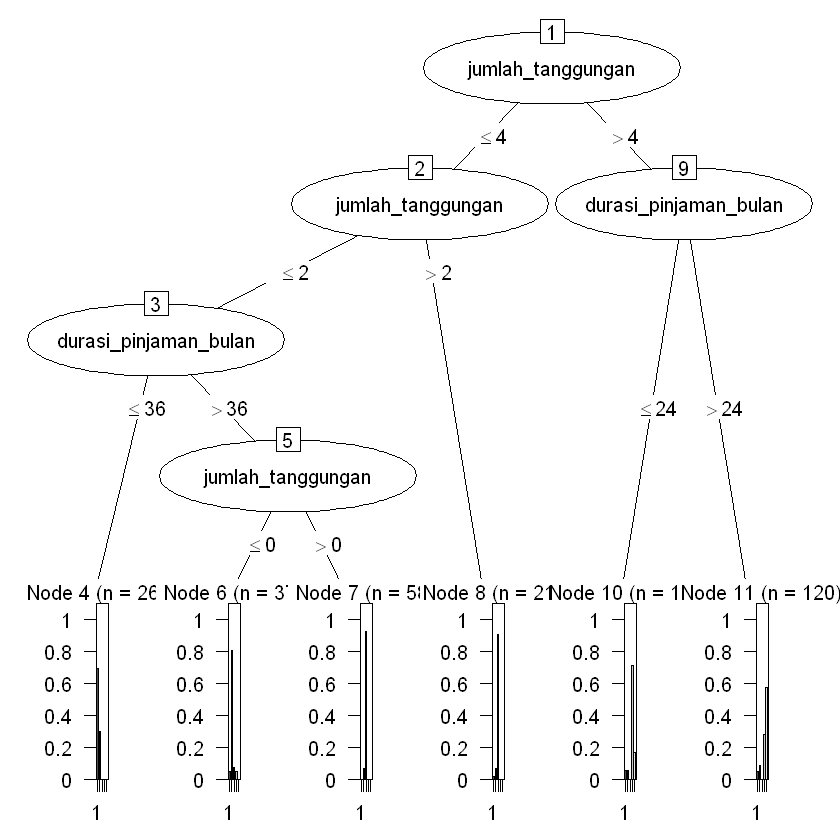

In [44]:
plot(risk_rating_model)

### Elemen dari Plot Decision Tree C5.0

Berikut adalah gambar dari plot Decision Tree C5.0 yang telah diberi warna dengan penjelasan berikut (setelah gambar).

![diagram](images/diagram.png)

* Warna merah menunjukkan node dan penomoran nodenya
    * bulatan merah nomor 1 adalah node nomor 1 adalah root node dengan variable penentu jumlah_tanggungan.
    * bulatan merah nomor 2 adalah node nomor 2 dengan variable penentu jumlah_tanggungan.
    * bulatan merah nomor 3 adalah node nomor 7 adalah leaf node untuk klasifikasi risk_rating.
* Warna biru menunjukkan kondisi split ke node-node berikutnya
    * bulatan biru nomor 4 menunjukkan kondisi split dimana durasi pinjaman kurang atau sama dengan 24 bulan.
    * bulatan biru nomor 5 menunjukkan kondisi split dimana durasi pinjaman lebih dari 24 bulan.
* Warna hijau menunjukkan jumlah data yang telah diklasifikasi.
    * bulatan hijau nomor 6 menunjukkan hasil klasifikasi sebanyak 98 data.
    * bulatan hijau nomor 7 menunjukkan hasil klasifikasi sebanyak 129 data.
* Warna ungu menunjukkan hasil klasifikasi dan distribusinya (dalam rentang rasio antara angka 0 dan  1).
    * bulatan ungu nomor 8 menunjukkan risk_rating pada node tersebut mayoritas adalah 4, dan dengan demikian model mengambil itu sebagai klasifikasinya. Selain itu risk_rating 5, 1, dan 2 adalah data yang juga sebenarnya jatuh ke dalam kondisi yang berakhir di node nomor 10 ini.
    * bulatan ungu nomor 9 menunjukkan risk_rating pada node tersebut mayoritas adalah 5, dan dengan demikian model mengambil itu sebagai klasifikasinya. Selain itu risk_rating 4, 2, dan 1 adalah data yang juga sebenarnya jatuh ke dalam kondisi yang berakhir di node nomor 11 ini.

### Evaluasi Model

Confusion Matrix yang terdapat pada output model sebelumnya adalah evaluasi model menggunakan training set. Namun, model ini perlu dievaluasi terhadap testing set yang telah disiapkan.

### Menggunakan Fungsi Predict

Package C50 memiliki fungsi bernama predict, yang bisa digunakan untuk melakukan prediksi berdasarkan input model dan data test. Fungsi lengkapnya terlihat sebagai berikut.

In [52]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "dataset/credit_scoring.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))

#menggunakan model untuk prediksi testing set
predict(risk_rating_model, input_testing_set)

[1] 1 1 3 3 5 5 1 1 1 3 1 2 1 1 3 3 1 3 3 3 3 3 1 5 1 1 3 1 3 5 1 1 2 1 5 1 1
 [38] 5 3 3 3 3 4 3 3 1 3 5 2 3 2 5 3 5 1 5 4 5 3 4 1 3 4 4 3 5 5 5 3 1 1 1 1 3
 [75] 5 1 4 5 3 1 3 3 3 3 3 1 3 3 5 4 5 3 3 3 1 1 5 5 3 3
Levels: 1 2 3 4 5

Terlihat hasil prediksi semua sesuai dengan posisi baris data dari testing set. Dan ini juga sesuai dengan rentang nilai risk_rating, yaitu 1 sampai dengan 5.

Selanjutnya hasil ini akan disimpan ke dalam variable data frame input_testing_set.

In [53]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "dataset/credit_scoring.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))

#menyimpan risk_rating dari data awal dan hasil prediksi testing set ke dalam kolom hasil_prediksi
input_testing_set$risk_rating <- dataCreditRating[-indeks_training_set,]$risk_rating
input_testing_set$hasil_prediksi <- predict(risk_rating_model, input_testing_set)

#menampilkan variable input_testing_set
print(input_testing_set)

    durasi_pinjaman_bulan jumlah_tanggungan risk_rating hasil_prediksi
3                      12                 0           1              1
5                      36                 0           2              1
8                      48                 3           2              3
40                     36                 3           2              3
41                     48                 6           2              5
44                     48                 5           2              5
58                     12                 0           1              1
70                     12                 0           1              1
109                    12                 0           1              1
110                    12                 4           3              3
122                    12                 0           1              1
151                    48                 0           2              2
179                    36                 1           1              1
180   

### Membuat Table Confusion Matrix

Setelah hasil prediksi terhadap testing set selesai, langkah berikutnya adalah melihat distribusi mana yang terprediksi dengan benar dan salah menggunakan confusion matrix.

Untuk menghasilkan confusion matrix dapat menggunakan fungsi dcast dari package *reshape2*, caranya adalah sebagai berikut.

In [54]:
library("openxlsx")
library("C50")
library("reshape2")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))

#menyimpan risk_rating dari data awal dan hasil prediksi testing set ke dalam kolom hasil_prediksi
input_testing_set$risk_rating <- dataCreditRating[-indeks_training_set,]$risk_rating
input_testing_set$hasil_prediksi <- predict(risk_rating_model, input_testing_set)

#membuat confusion matrix
dcast(hasil_prediksi ~ risk_rating, data=input_testing_set)

Using hasil_prediksi as value column: use value.var to override.
Aggregation function missing: defaulting to length


hasil_prediksi,1,2,3,4,5
1,24,6,0,0,0
2,0,3,1,0,0
3,0,2,37,0,0
4,0,0,0,7,0
5,0,2,0,2,16


![hp](images/hp.png)

Yang diperhatikan adalah bagian berwarna berikut:

![hp2](images/hp2.png)

Header kolom yang berwarna ungu menunjukkan risk_rating hasil prediksi, sedangkan header baris warna ungu menunjukkan data risk_rating sebenarnya. Diagonal warna biru menunjukkan jumlah data yang terprediksi dengan benar, dan warna merah menunjukkan data yang salah terprediksi.

Sekilas terlihat jumlah yang terprediksi dengan benar jauh lebih besar porsinya dibandingkan yang salah. Namun untuk yang 4 dan 5 ada sedikit catatan diman prediksi 5 itu kadang jatuh ke 4. Namun ini bisa diabaikan, karena 4 dan 5 memang beresiko tinggi.

Untuk rasio persentase kebenaran dan kesalahan prediksi lebih detil akan dihitung pada bagian berikutnya.

*Note : Output pada gambar tidak sama persis hasilnya dengan output pada R yang dijalankan*

### Jumlah Data dengan Prediksi Benar

Untuk menghitung persentase error, dapat dilakukan dengan menghitung terlebih dahulu jumlah data dengan prediksi yang benar. Hasil dikatakan benar jika data risk_rating sama dengan hasil_prediksi.

In [55]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))

#menyimpan risk_rating dari data awal dan hasil prediksi testing set ke dalam kolom hasil_prediksi
input_testing_set$risk_rating <- dataCreditRating[-indeks_training_set,]$risk_rating
input_testing_set$hasil_prediksi <- predict(risk_rating_model, input_testing_set)

#Menghitung jumlah prediksi yang benar
input_testing_set$risk_rating==input_testing_set$hasil_prediksi

[1]  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [25]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [97]  TRUE  TRUE  TRUE  TRUE

Ini artinya kalau TRUE maka data pada posisi tersebut prediksinya benar dan FALSE untuk sebaliknya, data pada posisi tersebut salah prediksinya. Namun ini masih belum dalam bentuk yang diinginkan. Masih perlu beberapa tambahan perintah tersebut untuk mengeluarkan persentase prediksi yang tepat.

Langkah berikutnya, adalah menyaring data frame tersebut dengan hasil tadi dengan perintah berikut.

In [56]:
input_testing_set[input_testing_set$risk_rating==input_testing_set$hasil_prediksi,]

,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating,hasil_prediksi
3,12,0,1,1
58,12,0,1,1
70,12,0,1,1
109,12,0,1,1
110,12,4,3,3
122,12,0,1,1
151,48,0,2,2
179,36,1,1,1
182,24,4,3,3
195,48,3,3,3


Terlihat semua hasil filtering memiliki nilai yang sama untuk kolom risk_rating dan hasil_prediksi. Kemudian akan dihitung jumlah baris filtering ini dengan menambahkan fungsi nrow terhadap perintah di atas, sebagai berikut.

In [57]:
nrow(input_testing_set[input_testing_set$risk_rating==input_testing_set$hasil_prediksi,])

[1] 87

Angka 87 ini menunjukkan jumlah data dengan prediksi yang benar terhadap testing set. Karena testing set berjumlah 100, maka persentase prediksi yang benar adalah 87%, dan error rate atau persentase yang salah adalah 13%.

Untuk mengecek hasil tersebut, dapat dilakukan dengan menjumlahkan posisi diagonal pada confusion matrix sebelumnya.

![hp3](images/hp3.png)

Hasilnya juga 87 yang merupakan hasil dari operasi penjumlah 24 + 3 + 37 + 7 + 16.

### Jumlah Data dengan Prediksi Salah

Operator == digunakan untuk membandingkan kesamaan antara kolom risk_rating dengan hasil_prediksi, sedangkan untuk mencari yang tidak sama dapat menggunakan operator != sehingga kondisi pengecekan sebelumnya menjadi seperti berikut.

In [58]:
nrow(input_testing_set[input_testing_set$risk_rating!=input_testing_set$hasil_prediksi,])

[1] 13

Terlihat bahwa jumlah prediksi error ada 13. Hasil ini konsisten jika dibandingkan dengan jumlah 87 dari prediksi yang benar, dimana total keduanya adalah 100 - yang merupakan jumlah data untuk testing set.

### Mempersiapkan Data Pengajuan Baru

Data pengajuan baru perlu dibentuk sebagai satu data frame dengan input dimana nama-nama variable yang digunakan harus sama persis. Dari awal pemodelan, kita menggunakan dua variable yakni:

* jumlah_tanggungan
* durasi_pinjaman_bulan

Keduanya dalam bentuk numerik (angka). Dan berikut adalah contoh membentuk data frame dengan dua variable tersebut.

In [59]:
aplikasi_baru <- data.frame(jumlah_tanggungan = 6, durasi_pinjaman_bulan = 12)

Data frame tersebut digunakan sebagai input untuk prediksi di bagian berikutnya.

In [60]:
#Membuat data frame aplikasi baru
aplikasi_baru <- data.frame(jumlah_tanggungan = 6, durasi_pinjaman_bulan = 12)
print(aplikasi_baru)

  jumlah_tanggungan durasi_pinjaman_bulan
1                 6                    12


### Melakukan Prediksi terhadap Data Pengajuan Baru

Data aplikasi baru yang telah dibuat sebelumnya akan diprediksi nilai risk_rating-nya dengan fungsi predict, dimana cara penggunaannya masih sama dengan cara sebelumnya ketika melakukan evaluasi model, yaitu dengan syntax berikut.

In [61]:
library("openxlsx")
library("C50")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating

#menghasilkan dan menampilkan summary model
input_testing_set <- datafeed[-indeks_training_set,]

#Membuat data frame aplikasi baru
risk_rating_model <- C5.0(input_training_set, class_training_set)
aplikasi_baru <- data.frame(jumlah_tanggungan = 6, durasi_pinjaman_bulan = 12)

#melakukan prediksi
predict(risk_rating_model, aplikasi_baru)

[1] 4
Levels: 1 2 3 4 5

Ini artinya hasil prediksi risk_rating untuk aplikasi baru ini adalah 4, dari kemungkinan 1, 2, 3, 4 dan 5. Nilai 4 ini adalah nilai resiko yang cukup tinggi, jadi bisa saja aplikasi baru ini ditolak sesuai dengan kebijakan lembaga peminjam.

#### Merubah durasi pinjam

In [12]:
#Membuat data frame aplikasi baru
aplikasi_baru <- data.frame(jumlah_tanggungan = 6, durasi_pinjaman_bulan = 64)

#melakukan prediksi
predict(risk_rating_model, aplikasi_baru)

[1] 5
Levels: 1 2 3 4 5

Ini artinya hasil prediksi risk_rating untuk aplikasi baru ini adalah 5, dari kemungkinan 1, 2, 3, 4 dan 5. Nilai 5 ini adalah nilai resiko yang sangat tinggi dikarenakan durasi peminjaman tidak termasuk dalam data yang di lakukan model.

### Thank You

Ada banyak catatan bagi Anda agar lebih baik menggunakan model ini, yaitu:

* Pada kenyataannya, variable yang terlibat jauh lebih banyak dan kadang masih dalam bentuk yang kosong, tidak lengkap atau tidak standar, ini memerlukan teknik data cleansing.
* Variable yang sangat banyak ini perlu diambil yang korelasinya tinggi saja. Tidak keseluruhan karena akan mengakibatkan pembentukan model tidak optimal. Teknik ini disebut data reduction atau feature selection, atau kalau lebih luas ilmunya mencakup apa yang dinamakan feature engineering.
* Evaluasi model yang juga umum dan menjadi best practice adalah menggunakan visualisasi ROC Curve.